In [1]:
import pandas as pd
import re

# Read the list of filenames from the configuration file
with open('file_list.txt', 'r', encoding='utf-8') as config_file:
    file_names = config_file.read().splitlines()

# Regex pattern to match the data format
pattern = r'\[(.*?)\] (.*?): (.*)'


# Initialize an empty list to store parsed data
datalist = []
stream_count = 0
# Iterate over each specified file
for file in file_names:
    full_path = file
    with open(full_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            match = re.match(pattern, line)
            if match:
                date, user, message = match.groups()
                datalist.append([date, user, message,stream_count])
    stream_count = stream_count + 1

# Create a DataFrame from the parsed data
data = pd.DataFrame(datalist, columns=["date", "user", "message","stream"])

In [2]:
# Group by 'stream' and aggregate unique users
users_per_stream = data.groupby("stream")["user"].unique().reset_index()

# Display the result
print(users_per_stream)

    stream                                               user
0        0  [Martin_Gales, StreamElements, Aloddin, utaBz,...
1        1  [StreamElements, Martin_Gales, Zeololz, NSAPar...
2        2  [Martin_Gales, StreamElements, sbeedy20, Banti...
3        3  [Martin_Gales, StreamElements, swedenhobohealt...
4        4  [Martin_Gales, StreamElements, jqqq777, SeeMeN...
..     ...                                                ...
82      82  [StreamElements, Kreeacher, oxGTx, Fossabot, b...
83      83  [balintboss, StreamElements, sercanwinchester,...
84      84  [StreamElements, balintboss, alvinesmiraldaa, ...
85      85  [balintboss, StreamElements, hanibal5291, Alum...
86      86  [Aluminiumminimumimmunity, balintboss, StreamE...

[87 rows x 2 columns]


In [3]:
# Group by 'users' and aggregate unique streams
stream_per_users = data.groupby("user")["stream"].unique().reset_index()

# Display the result
print(stream_per_users)

             user                                stream
0       00001joel                                [4, 5]
1          000mrx                                  [77]
2       00ramez00                                  [14]
3          01mezo                              [85, 86]
4     04lennart04                                  [73]
...           ...                                   ...
7288      게이머2334                                  [46]
7289          덕충2  [43, 44, 45, 46, 47, 55, 57, 58, 75]
7290          박준니                                  [84]
7291     쌍베님사랑합니다                              [74, 75]
7292        하이드로른                          [71, 72, 85]

[7293 rows x 2 columns]


In [4]:
stream_per_users["stream_count"] = stream_per_users["stream"].apply(len)

In [5]:
stream_per_users.head(5)

,user,stream,stream_count
0,00001joel,"[4, 5]",2
1,000mrx,[77],1
2,00ramez00,[14],1
3,01mezo,"[85, 86]",2
4,04lennart04,[73],1


In [6]:
stream_per_users['stream_count'].describe()

count    7293.000000
mean        3.139037
std         5.941050
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        87.000000
Name: stream_count, dtype: float64

In [7]:
# Function to calculate the longest streak of consecutive streams
def longest_streak(streams):
    sorted_streams = sorted(streams)
    max_streak = 1
    current_streak = 1
    
    for i in range(1, len(sorted_streams)):
        if sorted_streams[i] == sorted_streams[i-1] + 1:
            current_streak += 1
        else:
            max_streak = max(max_streak, current_streak)
            current_streak = 1
    
    return max(max_streak, current_streak)

In [8]:
# Add a column with the longest streak of consecutive streams
stream_per_users["longest_streak"] = stream_per_users["stream"].apply(longest_streak)

# Display the result
stream_per_users.head(5)

,user,stream,stream_count,longest_streak
0,00001joel,"[4, 5]",2,2
1,000mrx,[77],1,1
2,00ramez00,[14],1,1
3,01mezo,"[85, 86]",2,2
4,04lennart04,[73],1,1


In [9]:
stream_per_users["longest_streak"].describe()

count    7293.000000
mean        1.566022
std         2.768878
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        87.000000
Name: longest_streak, dtype: float64

In [10]:
stream_per_users[stream_per_users["stream_count"] > 3]["stream_count"].describe()

count    1429.000000
mean       10.244227
std        10.751580
min         4.000000
25%         4.000000
50%         6.000000
75%        11.000000
max        87.000000
Name: stream_count, dtype: float64

In [11]:
stream_per_users[stream_per_users['user']=='balintboss']

,user,stream,stream_count,longest_streak
2534,balintboss,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",87,87


In [12]:
stream_per_users[stream_per_users['stream_count']>= 43]

,user,stream,stream_count,longest_streak
30,1206paul_,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",87,87
236,Aloddin,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14,...",78,21
239,Aluminiumminimumimmunity,"[9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21...",77,75
326,Banties1g,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",73,36
468,Cuhhsin,"[23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 3...",45,27
777,GoodStuffBuds,"[11, 13, 16, 19, 20, 21, 26, 27, 28, 31, 33, 3...",47,6
796,Grumsee,"[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14...",52,7
884,IRLKingsman,"[9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20...",62,47
919,IvanOnMyOwn,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",79,38
920,Ivana_10,"[0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 15...",54,7


In [13]:
user_watche_these = stream_per_users[stream_per_users['user']=='NSAPartyVan']['stream']

for s in user_watche_these:
    print(s)

[ 0  1  2  4  5  6 18]


In [14]:
stream_per_users[stream_per_users['stream_count']>1]['stream_count'].describe()

count    3234.000000
mean        5.823748
std         8.164288
min         2.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        87.000000
Name: stream_count, dtype: float64

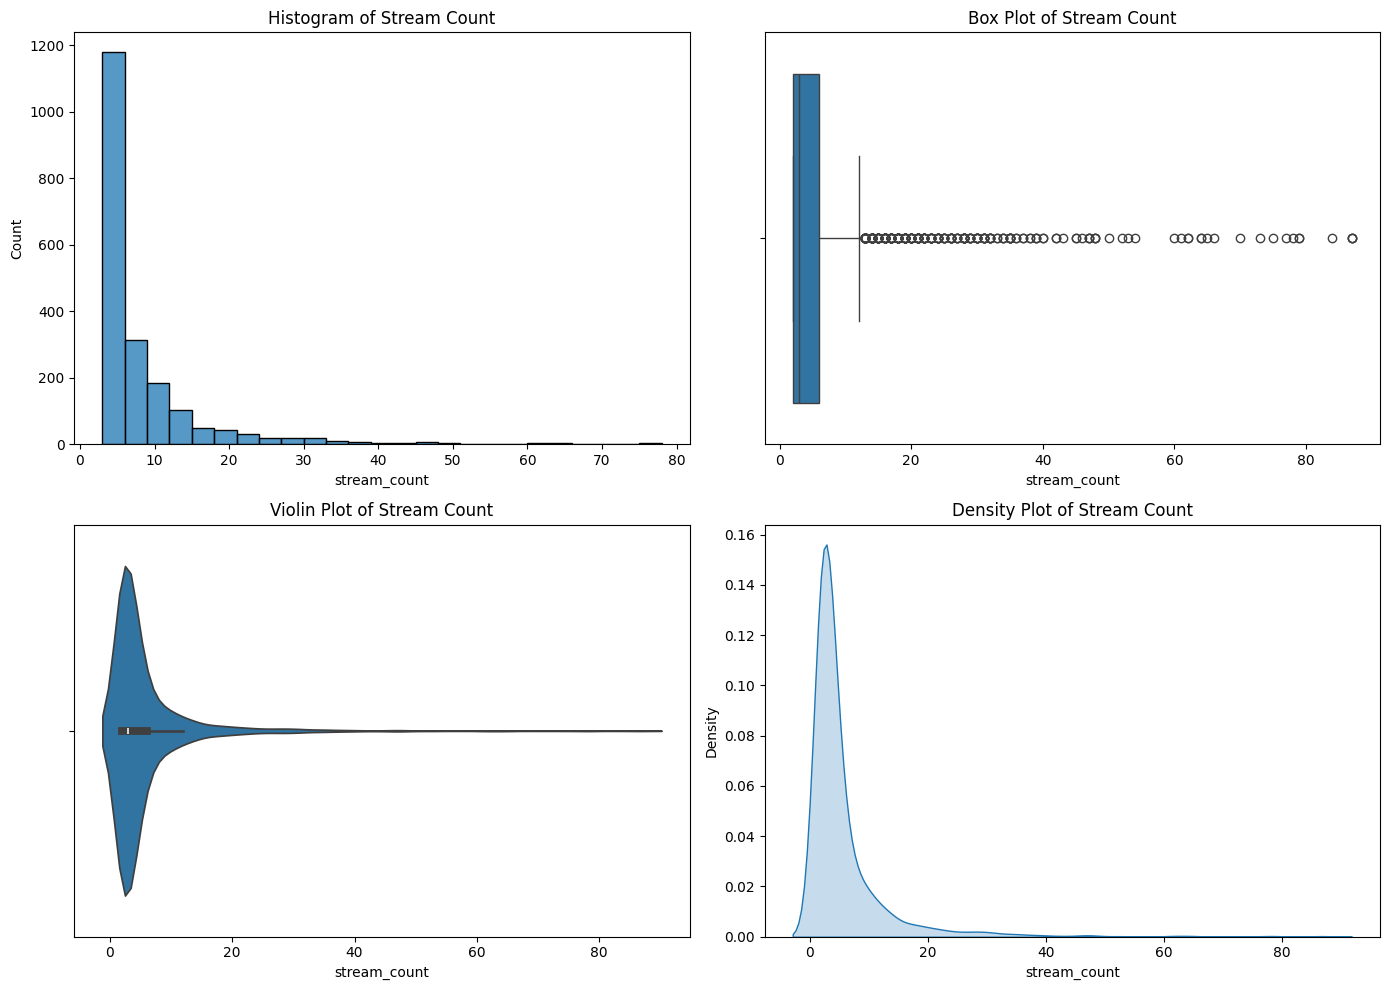

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'stream_per_users' is your DataFrame
TopData = stream_per_users[stream_per_users['stream_count'] > 1]['stream_count']

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram
sns.histplot(TopData, bins=range(3, 80, 3), kde=False, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Stream Count')

# Box Plot
sns.boxplot(x=TopData, ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of Stream Count')

# Violin Plot
sns.violinplot(x=TopData, ax=axes[1, 0])
axes[1, 0].set_title('Violin Plot of Stream Count')

# Density Plot
sns.kdeplot(TopData, ax=axes[1, 1], fill=True)
axes[1, 1].set_title('Density Plot of Stream Count')

# Adjust layout
plt.tight_layout()
plt.show()

In [16]:
stream_per_users['last_stream'] = stream_per_users['stream'].apply(max)

stream_per_users.head(5)


,user,stream,stream_count,longest_streak,last_stream
0,00001joel,"[4, 5]",2,2,5
1,000mrx,[77],1,1,77
2,00ramez00,[14],1,1,14
3,01mezo,"[85, 86]",2,2,86
4,04lennart04,[73],1,1,73


In [17]:
ogLost = stream_per_users[stream_per_users['stream_count']>10]['last_stream'].min()

In [18]:
stream_per_users[(stream_per_users['stream_count']>10) & (stream_per_users['last_stream']== ogLost)]

,user,stream,stream_count,longest_streak,last_stream
5393,obungle,"[8, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 25...",14,5,27
6207,sixthbyaku,"[1, 2, 4, 6, 7, 8, 12, 13, 18, 26, 27]",11,3,27


In [19]:
stream_per_users[(stream_per_users['stream_count']>5) & (stream_per_users['last_stream'] <= 20)]

,user,stream,stream_count,longest_streak,last_stream
1020,KaliYuga03,"[4, 6, 7, 11, 12, 13, 14, 15]",8,5,15
1323,NSAPartyVan,"[0, 1, 2, 4, 5, 6, 18]",7,3,18
2215,akitox1c,"[7, 8, 9, 10, 11, 14, 17]",7,5,17
2335,anatolyxd,"[3, 5, 6, 7, 9, 16]",6,3,16
3793,hardcoremortalkombatplaya,"[1, 2, 3, 5, 6, 7, 14]",7,3,14
5497,ozen0416,"[5, 6, 7, 11, 17, 18]",6,3,18
5547,paultuuu,"[6, 7, 9, 10, 11, 16, 17, 18]",8,3,18
6376,stealyourshoes,"[0, 3, 9, 10, 16, 19]",6,2,19
7035,xlars,"[1, 5, 7, 8, 13, 14]",6,2,14


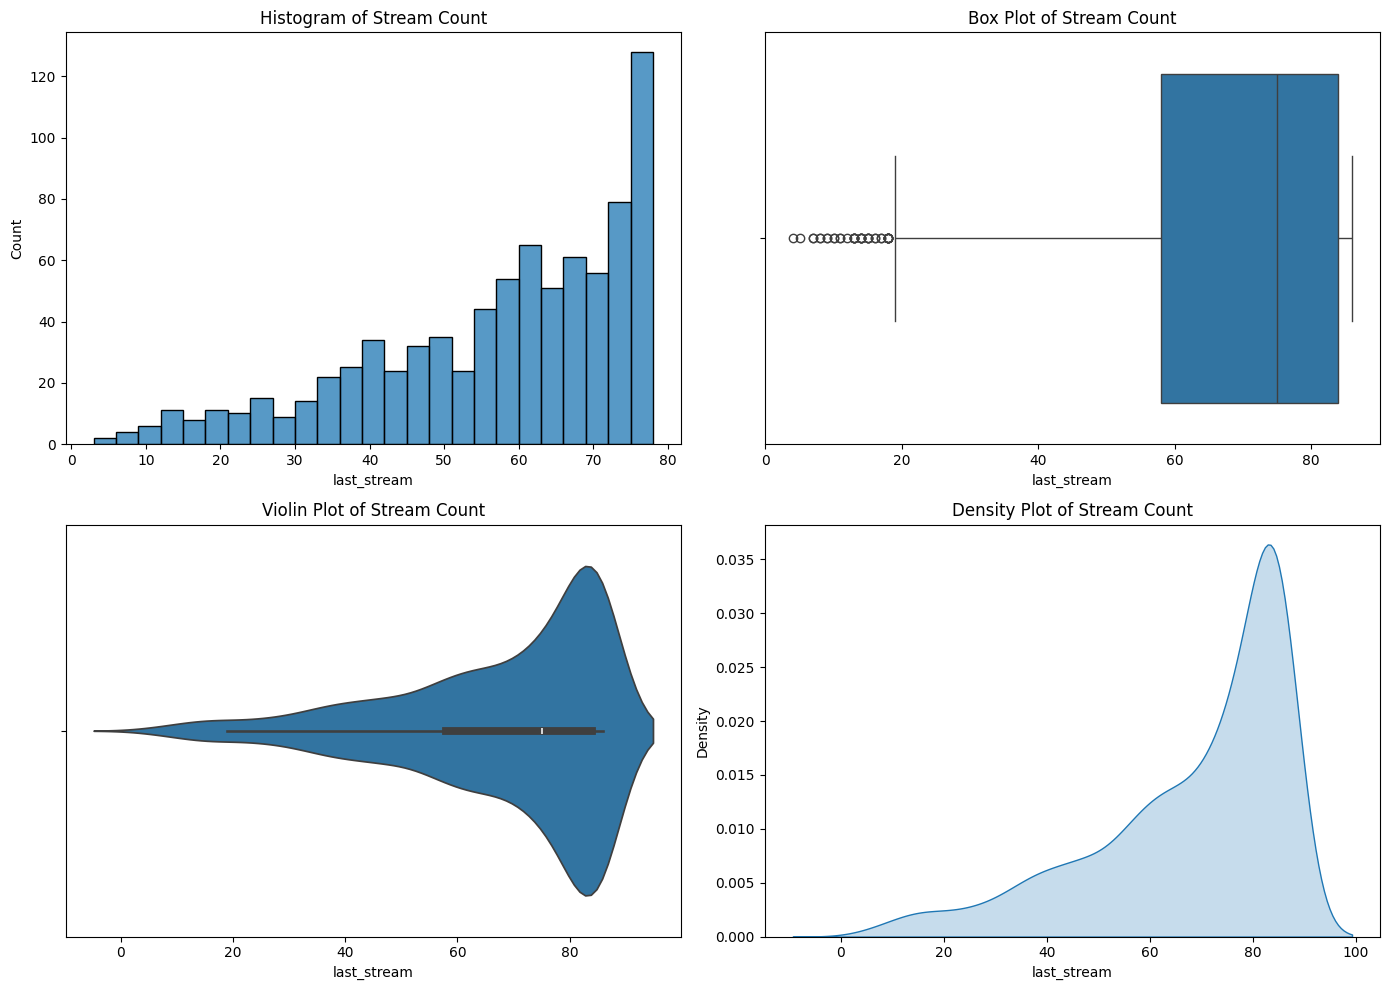

In [20]:
# Assuming 'stream_per_users' is your DataFrame
TopData = stream_per_users[stream_per_users['stream_count']>3]['last_stream']

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram
sns.histplot(TopData, bins=range(3, 80, 3), kde=False, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Stream Count')

# Box Plot
sns.boxplot(x=TopData, ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of Stream Count')

# Violin Plot
sns.violinplot(x=TopData, ax=axes[1, 0])
axes[1, 0].set_title('Violin Plot of Stream Count')

# Density Plot
sns.kdeplot(TopData, ax=axes[1, 1], fill=True)
axes[1, 1].set_title('Density Plot of Stream Count')

# Adjust layout
plt.tight_layout()
plt.show()

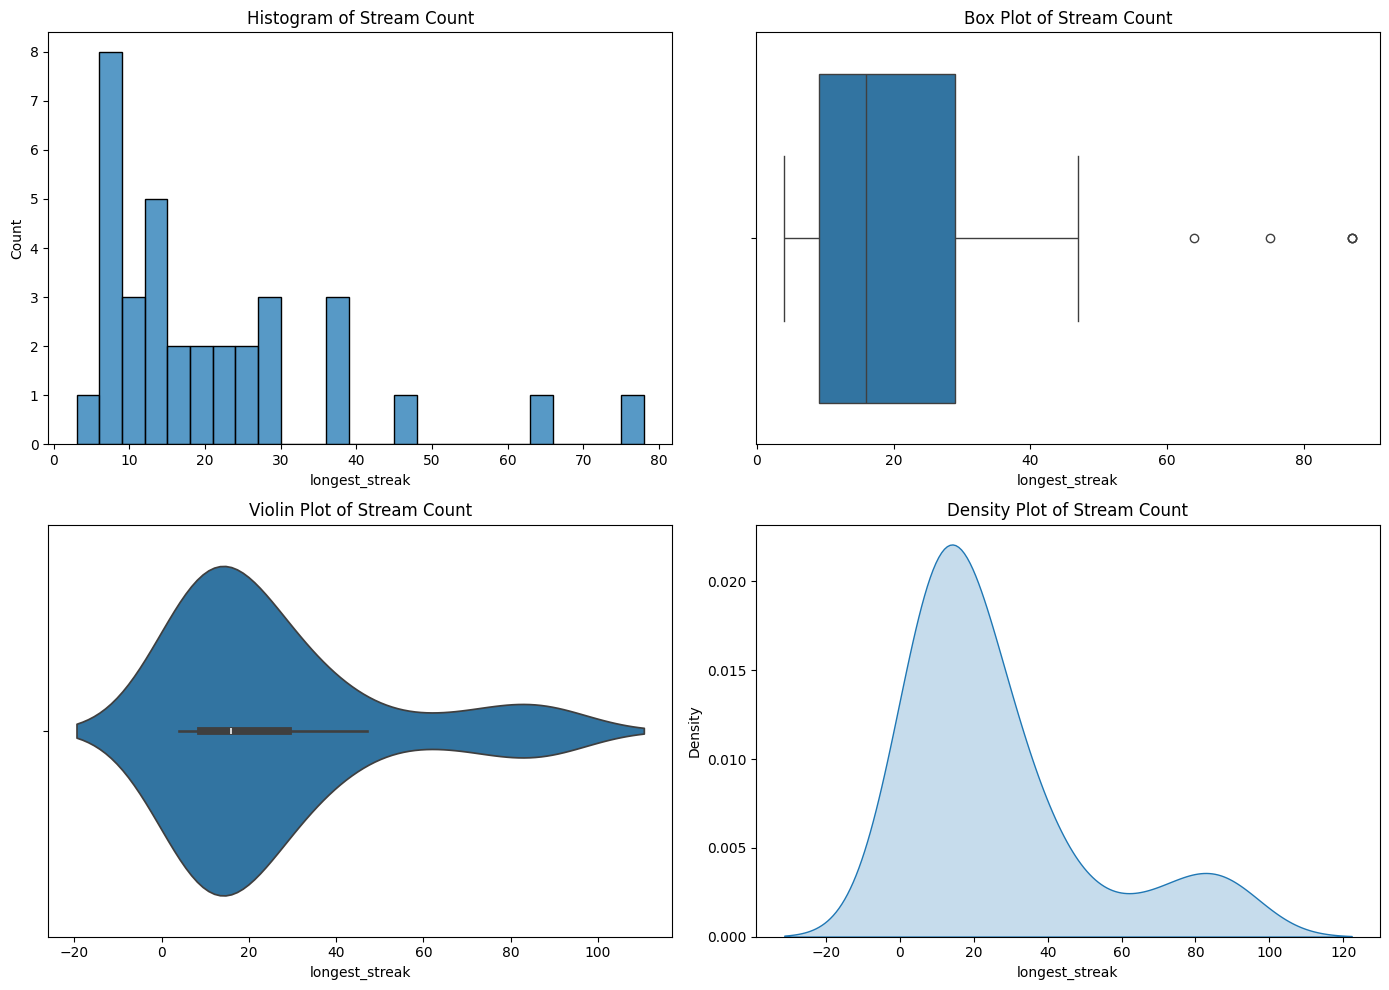

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'stream_per_users' is your DataFrame
TopData = stream_per_users[stream_per_users['stream_count']>= 40]['longest_streak']

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram
sns.histplot(TopData, bins=range(3, 80, 3), kde=False, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Stream Count')

# Box Plot
sns.boxplot(x=TopData, ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of Stream Count')

# Violin Plot
sns.violinplot(x=TopData, ax=axes[1, 0])
axes[1, 0].set_title('Violin Plot of Stream Count')

# Density Plot
sns.kdeplot(TopData, ax=axes[1, 1], fill=True)
axes[1, 1].set_title('Density Plot of Stream Count')

# Adjust layout
plt.tight_layout()
plt.show()